In [102]:
def dist(x:list,y:list)->float:
    pass
    d=0
    for i,j in zip(x,y):
        d+=abs(i-j)
    return d


In [103]:
def dist_mat_(points:list[tuple]):
    n=len(points)
    dist_mat=[ [None]*n for _ in points ]

    for i in range(n):
        for j in range(n):
            dist_mat[i][j] = dist(points[i],points[j])

    return dist_mat

In [104]:
datapoints = [
    (1,1), (1,2), (5,7), 
    (3,1), (3,3), (6,6), 
    (18,4),(18,3),(7,6), 
    (4,3), (4,7), (2,2), 
    (8,6), (8,7), (9,6)
]

In [134]:
def DBscan_scratch(points:list[tuple] , eps:float=2.0 , minpt:int=3 , return_labels:bool=False )->tuple:
    dm = dist_mat_(points)
    labels = [ 'P'+str(i) for i in range(1,len(points)+1)]

    table = {}
    # [ 'point label' ,  num of points with in eps ,  status:[core:1,border:0,noise:-1] ]
    l=len(dm)
    core=[]
    core_points=[]
    for i in range(l):
        
        table[labels[i]] = [ [] , 1 , -1]
        for j in range(l):
            if i!=j and eps > dm[i][j]:
                table[labels[i]][0]+=[labels[j]]
                table[labels[i]][1]+=1
        if table[labels[i]][1] >= minpt:
            core.append(labels[i])
            core_points.append(points[i])
            table[labels[i]][2] = 1

    border=[]
    border_points=[]
    outlier=[]
    outlier_points=[]
    for k,v in table.items():
        if v[2]!= 1:
            for value in [k]+v[0]:
                if value in core:
                    table[k][2]=0
                    border.append(k)
                    border_points.append(points[labels.index(k)])
                else:
                    outlier.append(k)
                    outlier_points.append(points[labels.index(k)])

    print(table)
    return table
    if return_labels==True:
        return core,border,outlier
    return core_points,border_points,outlier_points


# c,b,o=DBscan_scratch(datapoints)
ta=DBscan_scratch(datapoints)



{'P1': [['P2'], 2, 0], 'P2': [['P1', 'P12'], 3, 1], 'P3': [['P11'], 2, -1], 'P4': [[], 1, -1], 'P5': [['P10'], 2, -1], 'P6': [['P9'], 2, 0], 'P7': [['P8'], 2, -1], 'P8': [['P7'], 2, -1], 'P9': [['P6', 'P13'], 3, 1], 'P10': [['P5'], 2, -1], 'P11': [['P3'], 2, -1], 'P12': [['P2'], 2, 0], 'P13': [['P9', 'P14', 'P15'], 4, 1], 'P14': [['P13'], 2, 0], 'P15': [['P13'], 2, 0]}


In [141]:
import pandas as pd
pd.DataFrame(ta).T

,0,1,2
P1,[P2],2,0
P2,"[P1, P12]",3,1
P3,[P11],2,-1
P4,[],1,-1
P5,[P10],2,-1
P6,[P9],2,0
P7,[P8],2,-1
P8,[P7],2,-1
P9,"[P6, P13]",3,1
P10,[P5],2,-1


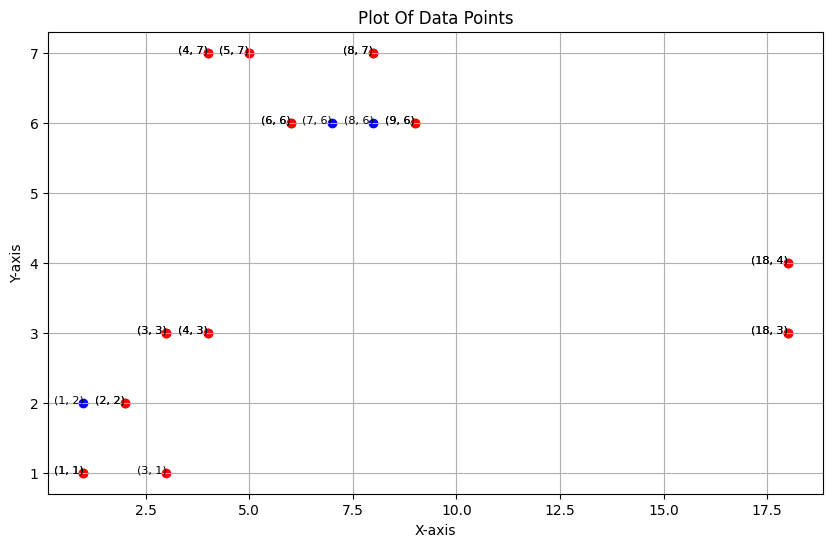

In [142]:
import matplotlib.pyplot as plt

x = [point[0] for point in c]
y = [point[1] for point in c]
labels = ['p'+str(i) for i in range(1,len(datapoints))]

x_ = [point[0] for point in b]
y_ = [point[1] for point in b]

x__ = [point[0] for point in o]
y__ = [point[1] for point in o]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='blue')

plt.scatter(x_, y_, color='green')

plt.scatter(x__, y__, color='red')


for (x_val, y_val),label in zip(c,c):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')
for (x_val, y_val),label in zip(b,b):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')
for (x_val, y_val),label in zip(o,o):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of data points'.title())

plt.grid(True)
plt.show()

DBSCAN using Library (iris data)

In [131]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [108]:
# iris = pd.DataFrame( load_iris().data,columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
data = load_iris().data 

data = [[1,2],[2,1],[2,2],[1,1.5],[2,1.5],[4,5],[2,0.5],[2.3,1],[1,1.1]]

data = [
    (1,1), (1,2), (5,7), 
    (3,1), (3,3), (6,6), 
    (18,4),(18,3),(7,6), 
    (4,3), (4,7), (2,2), 
    (8,6), (8,7), (9,6)
]

type(data)

list

In [115]:
dbscan = DBSCAN(eps=2,min_samples=3)
dbscan.fit(data)

DBSCAN(eps=2, min_samples=3)

In [116]:
pd.DataFrame([dbscan.labels_,data])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,1,0,0,1,-1,-1,1,0,1,0,1,1,1
1,"(1, 1)","(1, 2)","(5, 7)","(3, 1)","(3, 3)","(6, 6)","(18, 4)","(18, 3)","(7, 6)","(4, 3)","(4, 7)","(2, 2)","(8, 6)","(8, 7)","(9, 6)"


In [118]:
core_points=[ data[i] for i in dbscan.core_sample_indices_]

outlier_points = [data[i]  for i in range(len(data)) if dbscan.labels_[i]==-1]

border_points = [data[i]  for i in range(len(data)) if data[i] not in core_points+outlier_points]


pd.DataFrame( [ data,core_points ,outlier_points ,border_points] )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"(1, 1)","(1, 2)","(5, 7)","(3, 1)","(3, 3)","(6, 6)","(18, 4)","(18, 3)","(7, 6)","(4, 3)","(4, 7)","(2, 2)","(8, 6)","(8, 7)","(9, 6)"
1,"(1, 1)","(1, 2)","(5, 7)","(3, 1)","(3, 3)","(6, 6)","(7, 6)","(2, 2)","(8, 6)","(8, 7)","(9, 6)",None,None,None,None
2,"(18, 4)","(18, 3)",None,None,None,None,None,None,None,None,None,None,None,None,None
3,"(4, 3)","(4, 7)",None,None,None,None,None,None,None,None,None,None,None,None,None


In [124]:
print(core_points)
print(border_points)
print(outlier_points)

print(len(core_points))
print(len(border_points))
print(len(outlier_points))

[(1, 1), (1, 2), (5, 7), (3, 1), (3, 3), (6, 6), (7, 6), (2, 2), (8, 6), (8, 7), (9, 6)]
[(4, 3), (4, 7)]
[(18, 4), (18, 3)]
11
2
2


In [121]:
core_points,border_points,outlier_points

([(1, 1),
  (1, 2),
  (5, 7),
  (3, 1),
  (3, 3),
  (6, 6),
  (7, 6),
  (2, 2),
  (8, 6),
  (8, 7),
  (9, 6)],
 [(4, 3), (4, 7)],
 [(18, 4), (18, 3)])

In [114]:
import matplotlib.pyplot as plt

# Step 5: Plot the clusters
plt.figure(figsize=(8, 6))

# Plot the core points
plt.scatter(data[core_samples_mask, 0], data[core_samples_mask, 1], c=labels[core_samples_mask], cmap='viridis', marker='o', label='Core Points')

# Plot the border points
plt.scatter(data[border_samples_mask, 0], data[border_samples_mask, 1], c=labels[border_samples_mask], cmap='viridis', marker='^', label='Border Points')

# Plot the outliers
plt.scatter(data[outlier_samples_mask, 0], data[outlier_samples_mask, 1], c='red', marker='x', label='Outliers')

plt.title('DBSCAN Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Sepal length)')
plt.ylabel('Feature 2 (Sepal width)')
plt.legend()
plt.show()

TypeError: list indices must be integers or slices, not tuple

<Figure size 800x600 with 0 Axes>